In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import matplotlib
 
# DataSource
# https://www.kaggle.com/imdevskp/corona-virus-report/data#
    
file = 'covid_19_clean_complete.csv';

df1 = pd.read_csv(file,parse_dates=True);
%matplotlib inline


In [2]:
#First step is have a look at data set , what are the data available , data ranges for reach of them 
df1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [3]:
df1.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [4]:
#Data ranges . It doesnt makes sense for Lat ,Long , but for Confirmed , Deaths and Recovered it gives a sense 
df1.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,23842.000000,23842.000000,23842.000000,23842.000000,23842.000000
mean,21.433571,22.597991,1977.497274,114.972989,487.537203
std,24.740939,70.570976,19374.420803,1248.197344,4375.195339
min,-51.796300,-135.000000,-1.000000,-1.000000,0.000000
25%,7.000000,-19.020800,0.000000,0.000000,0.000000
50%,23.659750,20.921188,4.000000,0.000000,0.000000
75%,41.204400,81.000000,146.000000,2.000000,15.000000
max,71.706900,178.065000,823786.000000,44845.000000,95200.000000


In [5]:
#Look at the actual values . its similar to Cat file | head 
df1.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0,0,0
7,NaN,Armenia,40.0691,45.0382,1/22/20,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0,0


In [6]:
df1.tail(10)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
23832,NaN,Botswana,-22.328500,24.684900,4/21/20,20,1,0
23833,NaN,Burundi,-3.373100,29.918900,4/21/20,5,1,4
23834,NaN,Sierra Leone,8.460555,-11.779889,4/21/20,50,0,6
23835,NaN,Malawi,-13.254308,34.301525,4/21/20,18,2,3
23836,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,4/21/20,11,0,3
23837,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/21/20,1,0,0
23838,NaN,South Sudan,6.877000,31.307000,4/21/20,4,0,0
23839,NaN,Western Sahara,24.215500,-12.885800,4/21/20,6,0,0
23840,NaN,Sao Tome and Principe,0.186360,6.613081,4/21/20,4,0,0
23841,NaN,Yemen,15.552727,48.516388,4/21/20,1,0,0


In [7]:
#How many rows 
df1.shape

(23842, 8)

In [8]:
df1.size

190736

In [9]:
#How manu unique countries/Region and Province/States are there
# 2 formats for refering to the column. How use the column name with special characters.
df1.Lat.nunique()
df1['Country/Region'].nunique()


185

In [10]:
#first row
df1.iloc[1]

Province/State        NaN
Country/Region    Albania
Lat               41.1533
Long              20.1683
Date              1/22/20
Confirmed               0
Deaths                  0
Recovered               0
Name: 1, dtype: object

In [35]:
#Filter only Hubei province's data and list the top 5 
df_india = df1[df1['Country/Region'] == 'India']
df_india.tail(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
22663,NaN,India,21.0,78.0,2020-04-17,14352,486,2041
22925,NaN,India,21.0,78.0,2020-04-18,15722,521,2463
23187,NaN,India,21.0,78.0,2020-04-19,17615,559,2854
23449,NaN,India,21.0,78.0,2020-04-20,18539,592,3273
23711,NaN,India,21.0,78.0,2020-04-21,20080,645,3975


In [36]:
#Create a new Column 'date_i'
#Convert the Date into DateTime datastructure
#Make the new column as the index
df_india.loc[:,'date_i']=pd.to_datetime(df_india['Date']);
df_india = df_india.set_index('date_i')
df_india.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
date_i,,,,,,,,
2020-01-22,NaN,India,21.0,78.0,2020-01-22,0,0,0
2020-01-23,NaN,India,21.0,78.0,2020-01-23,0,0,0
2020-01-24,NaN,India,21.0,78.0,2020-01-24,0,0,0
2020-01-25,NaN,India,21.0,78.0,2020-01-25,0,0,0
2020-01-26,NaN,India,21.0,78.0,2020-01-26,0,0,0


Text(0, 0.5, 'No of confirmed Cases')

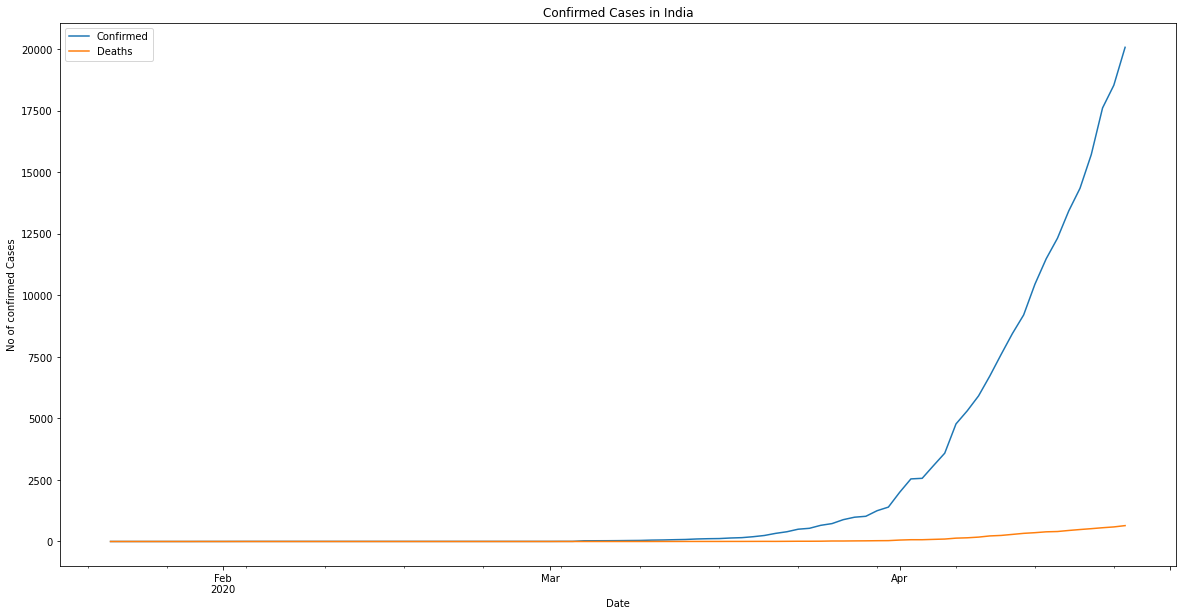

In [38]:
#Plot a line chart of confirmed cases in India 
ax = df_india['Confirmed'].plot(figsize=(20,10),title="Confirmed Cases in India",legend=True)
ax = df_india['Deaths'].plot(figsize=(20,10),title="Confirmed Cases in India",legend=True)
plt.xlabel('Date')
plt.ylabel('No of confirmed Cases')


Text(0, 0.5, 'No of Deaths')

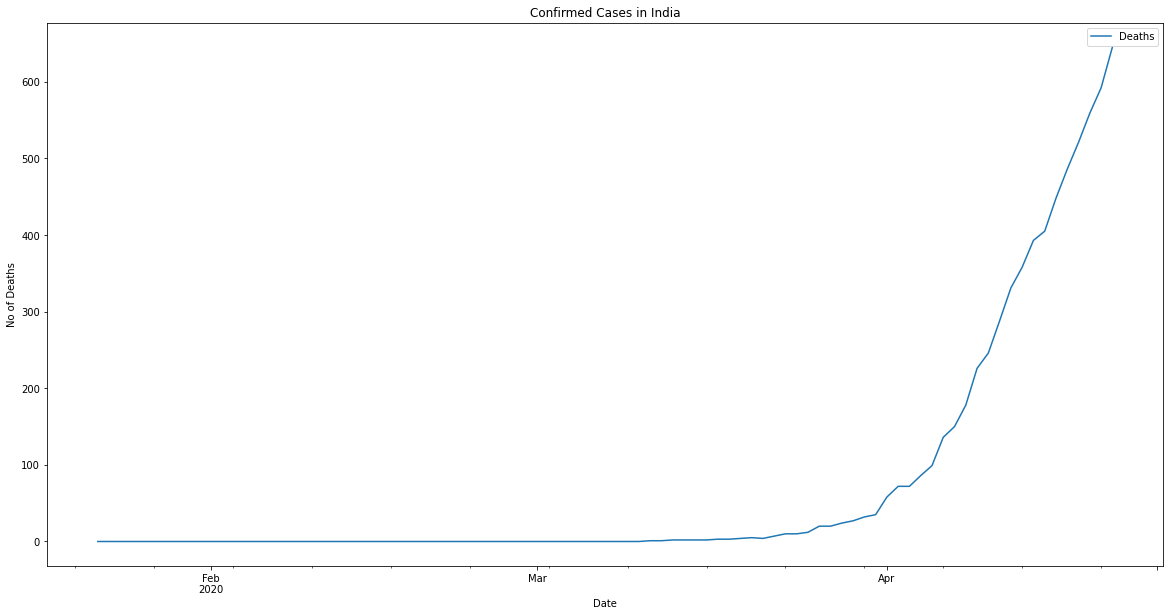

In [39]:
#Plot a line chart of confirmed cases in India 
ax = df_india['Deaths'].plot(figsize=(20,10),title="Confirmed Cases in India",legend=True)
plt.xlabel('Date')
plt.ylabel('No of Deaths')

In [14]:
df_india.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [15]:
#List of Columns in the original dataframe
df1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [16]:
#Converting Date as datetime. Note the change in datatype
df1['Date'] = pd.to_datetime(df1['Date'])
df1.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [17]:
#Fine the latest date in the dataset
max_date = df1['Date'].max()
max_date

Timestamp('2020-04-21 00:00:00')

In [18]:
#Create a new dataframe with only values on the last date.
df_lastday = df1[df1['Date']==max_date]
df_lastday.shape

(262, 8)

In [19]:
# Need to identify the countries which have most infections 
# Reshape the dataframe to the format ( Country Vs Confirmed cases ; as on last day)
# Top 10 countries are the one which we are interested in 
top_countries_df = pd.pivot_table(df_lastday,index='Country/Region', values='Confirmed',aggfunc=np.sum)\
.sort_values(by='Confirmed',ascending=False).head(10)
top_countries_df

,Confirmed
Country/Region,
US,823786
Spain,204178
Italy,183957
France,159297
Germany,148291
United Kingdom,130172
Turkey,95591
Iran,84802
China,83853


In [20]:
# Get the index of the new dataframe and convert it into a list 
top_countries_list = top_countries_df.index

In [21]:
#Group by Date and Country ; sum up all sub-area,county etc
df_grouped1 = df1.groupby(['Date','Country/Region']).Confirmed.sum()
df_grouped1.head(5)

Date        Country/Region
2020-01-22  Afghanistan       0
            Albania           0
            Algeria           0
            Andorra           0
            Angola            0
Name: Confirmed, dtype: int64

In [22]:
#Group by Country and Date ; sum up all sub-area,county etc
df_grouped_confirmed = df1.groupby(['Country/Region','Date']).Confirmed.sum()
df_grouped_confirmed.tail(5)

Country/Region  Date      
Zimbabwe        2020-04-17    24
                2020-04-18    25
                2020-04-19    25
                2020-04-20    25
                2020-04-21    28
Name: Confirmed, dtype: int64

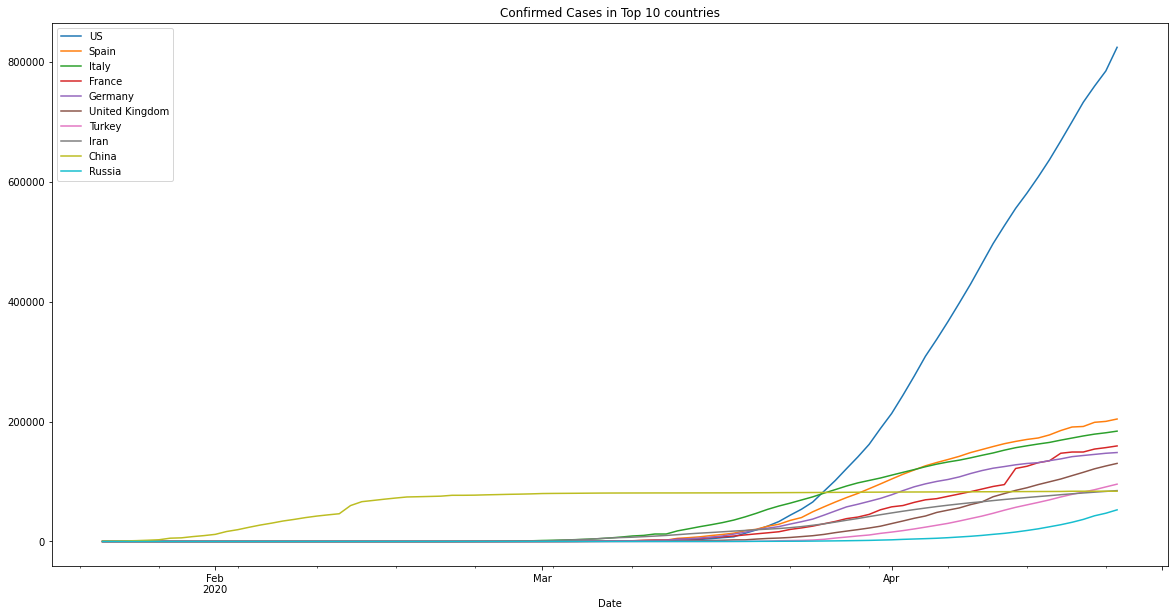

In [23]:
for country in top_countries_list:
    df_grouped_confirmed[country].plot.line(label= country,figsize=(20,10),\
                legend=True,title="Confirmed Cases in Top 10 countries" )

#Time series line plot of cumulative confirmed cases in top 10 cases    

In [24]:
#df_grouped_confirmed_incr =  df_grouped_confirmed.diff()
#df_grouped_confirmed_incr[df_grouped_confirmed_incr<0] = 0

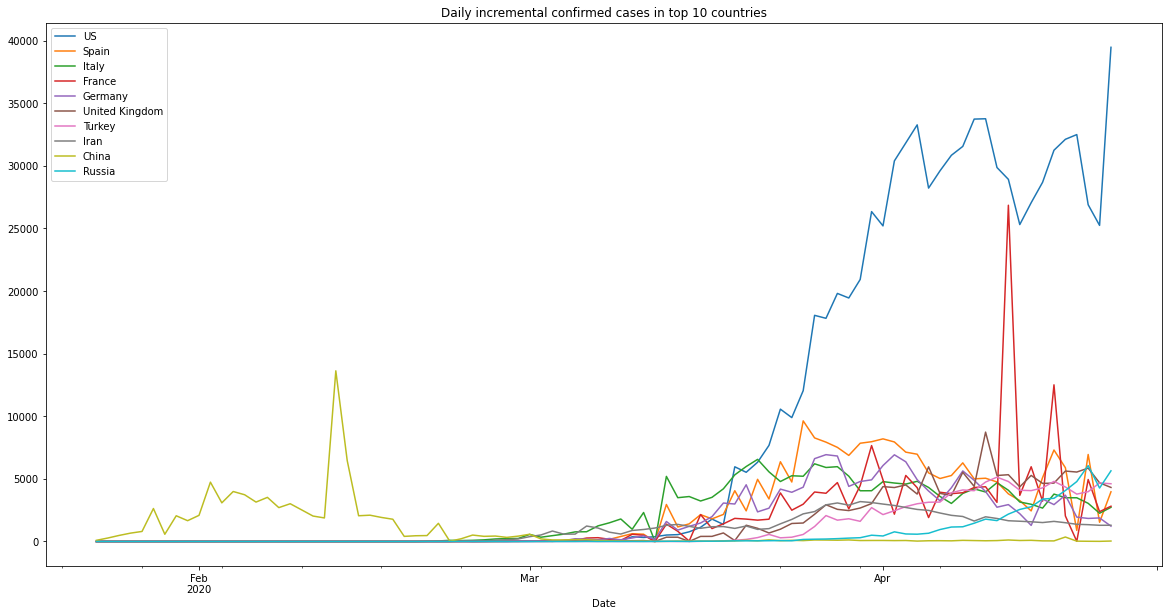

In [25]:
#In this usecase lot of importance is around the cases newly confirmed each day 
#.diff() calculates the difference of nth and n-1 th rows ie) newly added cases 
for country in top_countries_list:
    df_grouped_confirmed[country].diff().plot.line(label= country,figsize=(20,10),\
                legend=True,title="Daily incremental confirmed cases in top 10 countries" )
    
#Time series line plot of daily increases in confirmed cases in top 10 cases    

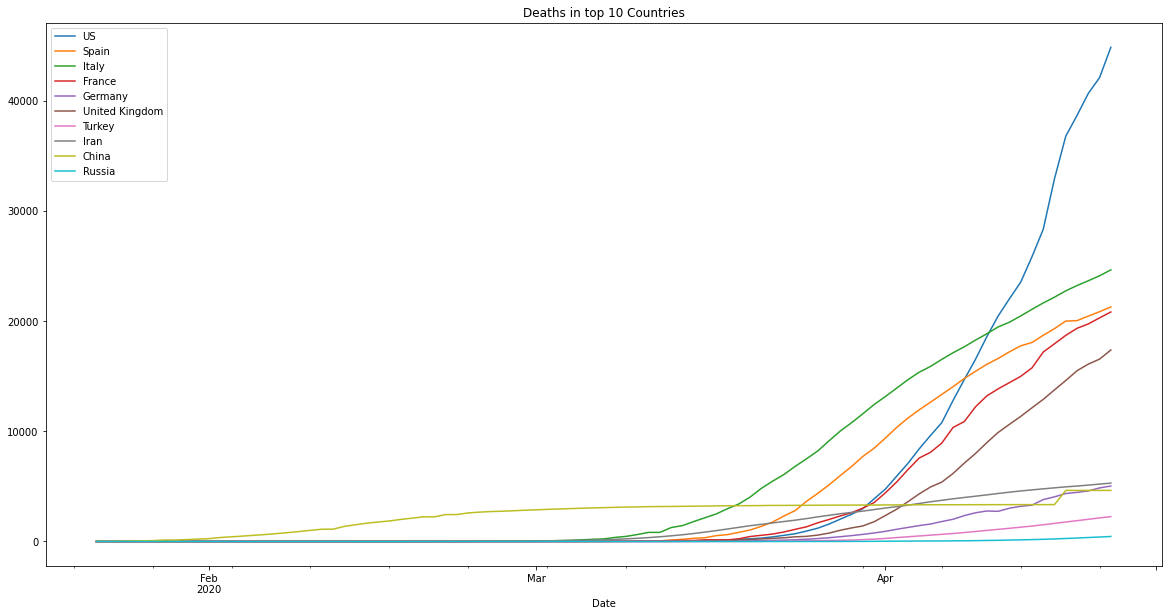

In [26]:
#Group by Country and then by Date on the Deaths
df_grouped_death = df1.groupby(['Country/Region','Date']).Deaths.sum()
for country in top_countries_list:
    df_grouped_death[country].plot.line(label= country,figsize=(20,10),legend=True,\
                title="Deaths in top 10 Countries")
#Time series line plot of cumulative deaths in each of top 10 countries    

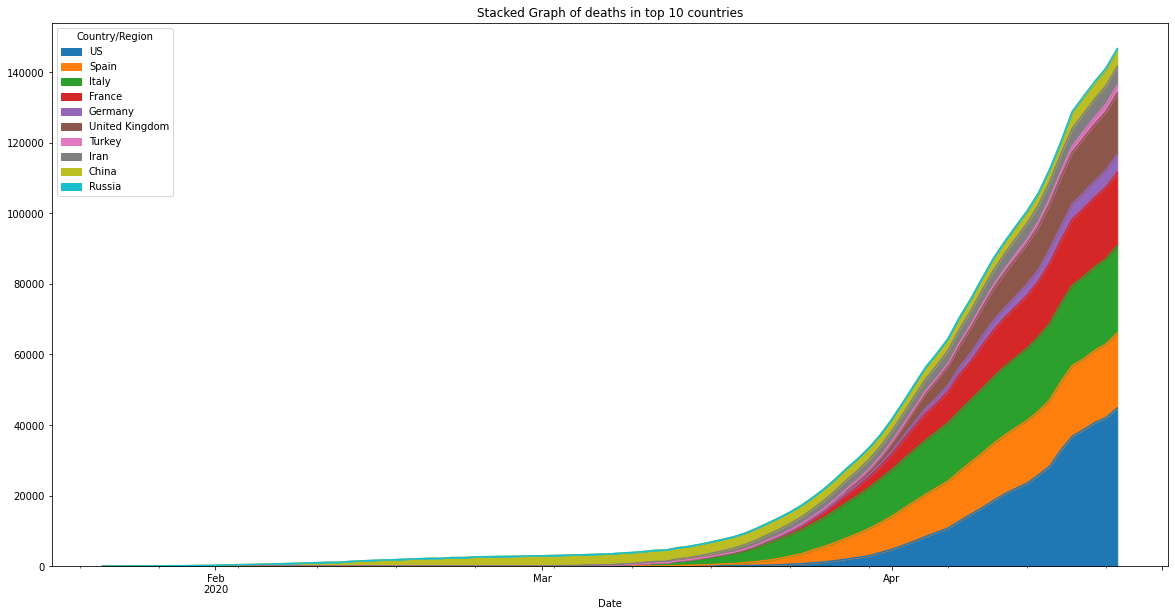

In [27]:
df2 = pd.pivot_table(df1,values='Deaths',index='Date',columns='Country/Region'\
                     ,aggfunc=np.sum);
#df2[top_countries_list].plot.area(figsize=(20,10),legend=True)
top = pd.Index.tolist(top_countries_list)
df2[top].plot.area(figsize=(20,10),title="Stacked Graph of deaths in top 10 countries")

#Charting total death as a stacked line chart in Top 10 countries

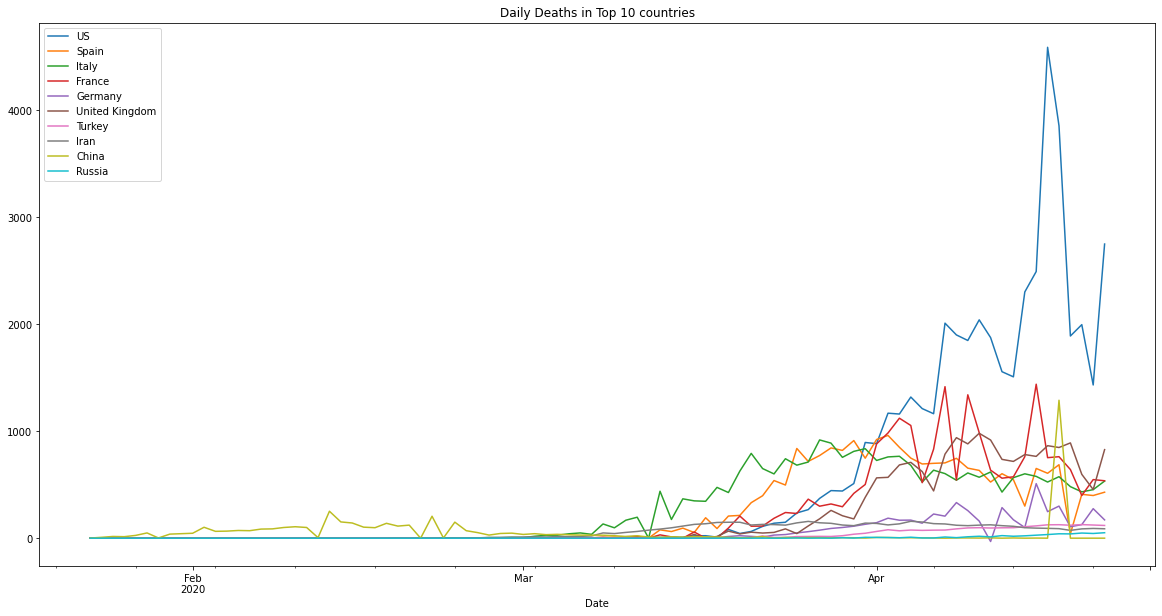

In [28]:

for country in top_countries_list:
    df_grouped_death[country].diff().plot.line(label= country,figsize=(20,10),legend=True,\
                    title="Daily Deaths in Top 10 countries")
#Time series line plot of daily increases in death in top 10 cases    

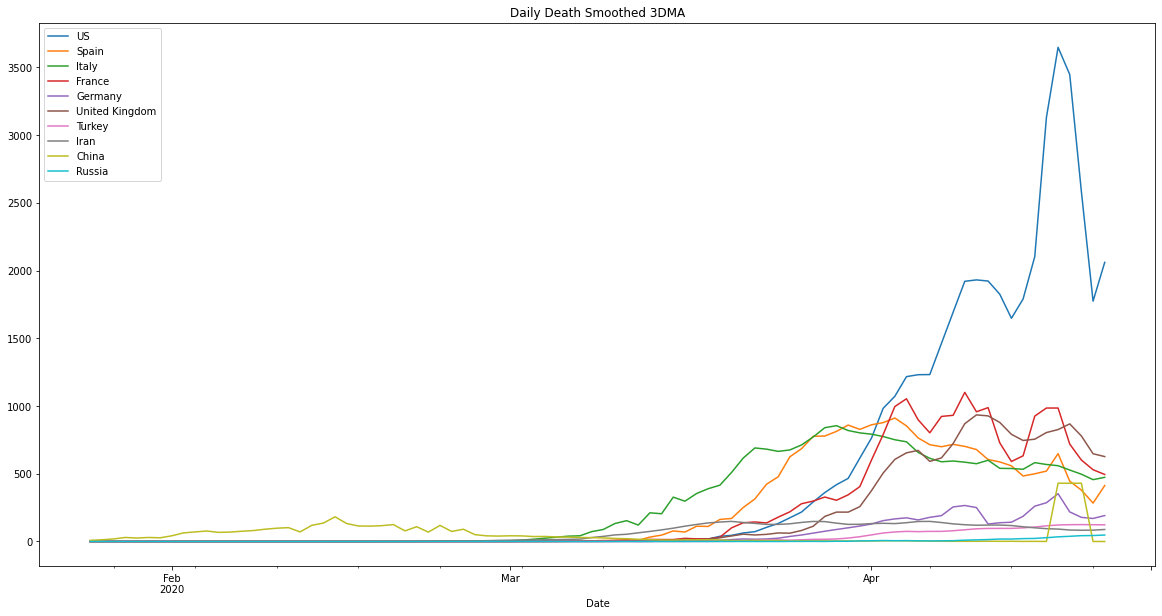

In [29]:
# Daily charts are very volatile . Curve can be smoothed by calculating moving averages.
#3 Day moving average of Death.
for country in top_countries_list:
    df_grouped_death[country].diff().rolling(3).mean().plot.line(label= country,\
                            figsize=(20,10),legend=True,title="Daily Death Smoothed 3DMA")
                                                            
#Time series line plot of daily increases in death in top 10 cases- smoothed - 3 Day Moving Average - 3DMA   

/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

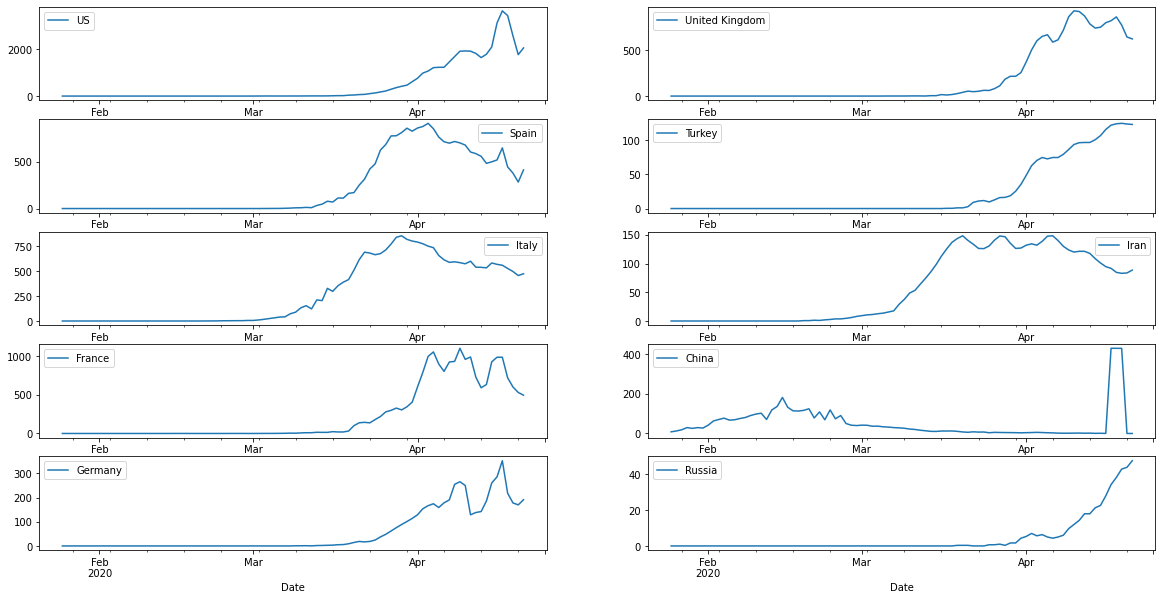

In [30]:
# 3 Day moving average of Death.
# Time series line plot of daily increases in death in top 10 cases- smoothed - 3 Day Moving Average - 3DMA    
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,10))
i=0;j=0;
for country in top_countries_list:
    if i==5 :
        i=0
        j=1
    df_grouped_death[country].diff().rolling(3).mean().plot.line(label= country ,ax=axes[i,j],legend=True)
    i=i+1;
plt.show()


In [31]:
#Observe the raw data and smoothed one .
df_grouped_death['US'].diff().rolling(3).mean().tail(10)

Date
2020-04-12    1825.000000
2020-04-13    1647.333333
2020-04-14    1789.666667
2020-04-15    2102.000000
2020-04-16    3129.333333
2020-04-17    3647.333333
2020-04-18    3446.333333
2020-04-19    2581.666667
2020-04-20    1773.666667
2020-04-21    2060.333333
Name: Deaths, dtype: float64

In [32]:
df_grouped_death['US'].diff().tail(10)

Date
2020-04-12    1557.0
2020-04-13    1509.0
2020-04-14    2303.0
2020-04-15    2494.0
2020-04-16    4591.0
2020-04-17    3857.0
2020-04-18    1891.0
2020-04-19    1997.0
2020-04-20    1433.0
2020-04-21    2751.0
Name: Deaths, dtype: float64

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5, 1.0, 'Actual Deaths vs Confirmed Case')

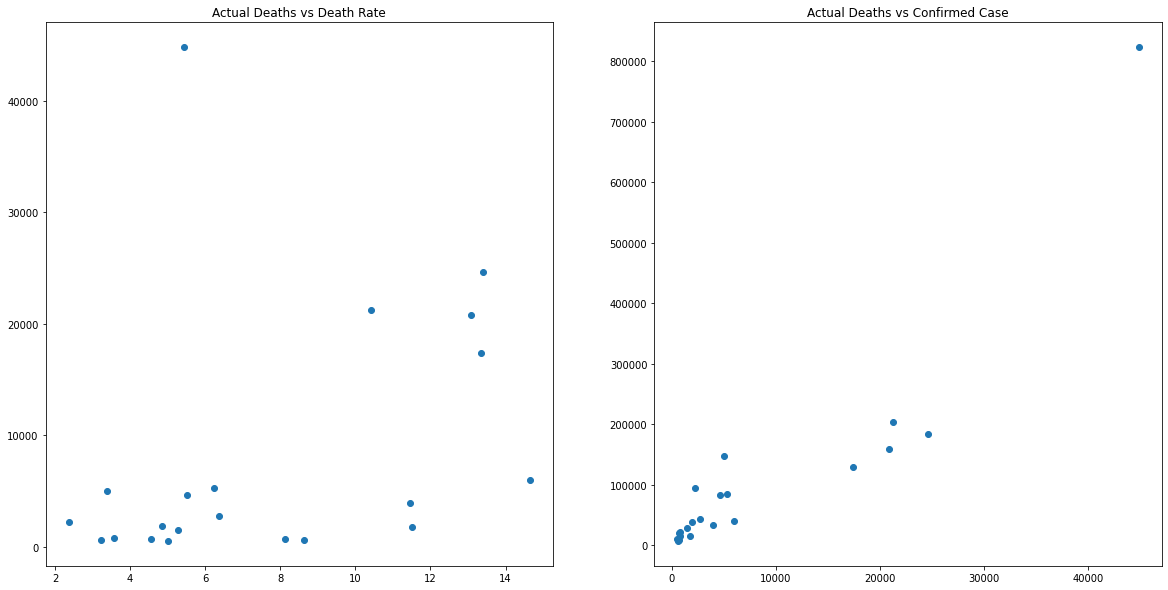

In [33]:
# On the latest date , calculate the death rate ie) Deaths vs confirmed 
# Scatter plot of confirmed Vs death 

df_lastday_details = pd.pivot_table(df_lastday,values=['Deaths','Confirmed'],index='Country/Region',aggfunc=np.sum)
df_lastday_details_gt_500 = df_lastday_details[df_lastday_details['Deaths'] > 500]
df_lastday_details_gt_500.loc[:,'DeathRate'] = (df_lastday_details_gt_500['Deaths']/df_lastday_details_gt_500['Confirmed'])*100;

#df_lastday_details_gt_500['DeathRate'] = (df_lastday_details_gt_500['Deaths']/df_lastday_details_gt_500['Confirmed'])*100;
#Above command throws settingwithcopywarning . Good article on how to deal with this warning 
#https://www.dataquest.io/blog/settingwithcopywarning/
    
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=False,figsize=(20,10))
ax1.scatter(df_lastday_details_gt_500['DeathRate'],df_lastday_details_gt_500['Deaths'])
ax1.set_title('Actual Deaths vs Death Rate')

ax2.scatter(df_lastday_details_gt_500['Deaths'],df_lastday_details_gt_500['Confirmed'])
ax2.set_title('Actual Deaths vs Confirmed Case')

#TODO how to put a legend for all the dots .